### Project: resume-classification 
    * Created by: Amzad hossain 
    * Created on: 2023-08-10 

## Problem statement 

the goal of this project is to categoirze resumes according to the job description. The dataset is taken from kaggle. The dataset contains 1250 resumes and 25 job descriptions. The dataset is in the form of csv files.





In [2]:
# imports 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os 



In [3]:
# EDA configuration file

data_dir = os.path.join(os.getcwd(), 'data/Resume.csv')
print(data_dir)

c:\Users\Amzad\Desktop\resume_classification\notebooks\data/Resume.csv


In [4]:
data= pd.read_csv(data_dir)

In [5]:
#all the cols 
data.columns 

Index(['ID', 'Resume_str', 'Resume_html', 'Category'], dtype='object')

### Dataset information 
   dataset contain following columns 

    1. ID {dtype: int} : resume identification number 
    2. Resume_str {dtype: str} : resume contain in string format 
    3. Category {dtype: str} : resume category


### number of categories 

In [7]:
len(data['Category'].unique())

24

In [40]:
data= data[["ID","Resume_str","Category"]]
data.head()

,ID,Resume_str,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...",HR
2,33176873,HR DIRECTOR Summary Over 2...,HR
3,27018550,HR SPECIALIST Summary Dedica...,HR
4,17812897,HR MANAGER Skill Highlights ...,HR


Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64


<Axes: title={'center': 'Category'}, xlabel='Category'>

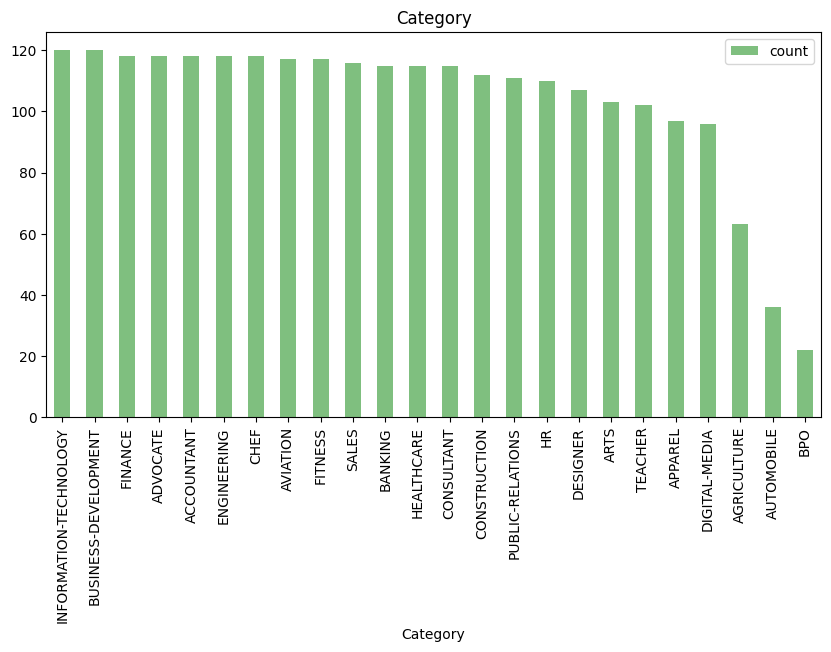

In [9]:
category =data['Category'].value_counts()
print(category)
category.plot(kind='bar',figsize=(10,5),title='Category',color='green',alpha=0.5, legend=True)


### finding 
    imbalace data : on class 
    AGRICULTURE                63
    AUTOMOBILE                 36
    BPO                        22



In [18]:
resume=data['Resume_str']
resume[5].strip()

'HR GENERALIST       Summary     Dedicated and focused Administrative Assistant who excels at prioritizing, completing multiple tasks simultaneously and following through to achieve project goals. Seeking a role of increased responsibility and authority.       Highlights         Microsoft Office proficiency  Excel spreadsheets  Meticulous attention to detail  Results-oriented  Self-directed      Time management  Professional and mature  Self-starter  Legal administrative support            Experience     11/2008   to   08/2014     HR Generalist    Company Name   －   City  ,   State      Managed visa related employment processes for all non-immigrant faculty and staff.  Improved productivity and enhanced visa related services.  Improved operational structure by developing guidelines and tools for internal and external administration of non-immigrant employment procedures  Reduced internal employment authorization processing times by approximately 30 percent.  Prepared, reviewed and subm

In [25]:
resume[6]

"         HR MANAGER       Summary    HUMAN RESOURCES MANAGER Extensive background in administrative duties, including experience in implementing staff development and training, mediation, conflict resolution, benefits and compensation training, HR records management, HR policies development and legal compliance.\n*Demonstrated success in, developing teambuilding programs, and writing personnel manuals, coordinating special programs, job descriptions and online State Mandated Training.      Highlights          University Events/Special Programs  Prepare Agendas  FMLA/ADA/EEO/WC  Mediation & Advocacy  HRIS Technologies\tTESOL Teacher for University staff  Employee Relations  Web Design using RedDot and Sharepoint  HR Program/Project Management  Microsoft Office Suites\tOrientation & On-Boarding  Training & Development  Performance Management  Organizational Development  HR Policies & Procedures  Publisher/InDesign/Quark              Accomplishments      Enjoy 5k Runs/Walks OF NOTE Profe

In [34]:
resume[10]

'         HR ASSISTANT       Summary    Highly motivated, and a dynamic Human Resources professional with diverse credentials seeking a position with a growing organization to make a positive impact on company policies, and experience career growth. Accomplished human resources and administrative professional with over 3 years\' experience. Attentive to detail, able to take initiative, prioritize multiple tasks and manage workload. Resourceful team player with a can-do attitude. Results-driven with strong communication, analytical, and interpersonal skills while maintain the utmost confidentiality.      Highlights          Compensation knowledge  MS Office Suite  AR/AP proficiency  Oracle knowledge  Great communication skills  Great analytical skills\t*New Hire Training  Filing & Records   Management  Spreadsheets/Reports  Office Management  Customer Service  QuickBooks, Peachtree  New Hire paperwork                Experience     03/2016   to   Current     Company Name   －   City  ,   

In [15]:
def remove_perenthesis(text):
    text = re.sub(r'\([^)]*\)', '', text)
    return text

x=x.apply(remove_perenthesis)

1. dataset contain too much space bwteen words .
2. dataset contain unwanted perenthesis  .
3. dataset contain unwanted symbols .



In [38]:
# loc category = hr 

Hr =data.loc[data['Category'] == 'hr']


### Missing  value 

In [43]:
data.isnull().sum() 

ID            0
Resume_str    0
Category      0
dtype: int64

### duplicate rows


In [45]:
data.duplicated().sum()

0

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          2484 non-null   int64 
 1   Resume_str  2484 non-null   object
 2   Category    2484 non-null   object
dtypes: int64(1), object(2)
memory usage: 58.3+ KB
